In [13]:
# Import machine learning data package.
import os
import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
from plotly.subplots import make_subplots 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from collections import Counter
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt 
from plotly.subplots import make_subplots 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yellowbrick  
from matplotlib.collections import PathCollection  
from statsmodels.graphics.gofplots import qqplot  
from sklearn.preprocessing import StandardScaler, RobustScaler 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, \
    ExtraTreesClassifier 
from sklearn.metrics import classification_report, accuracy_score  
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix 
from yellowbrick.style import set_palette  
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap  
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import shap
from sklearn.model_selection import cross_val_score
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from sklearn.ensemble import VotingClassifier

In [3]:
# Import data, data is in .CSV format.
path = 'E:/machine learning/qiguanqiekai/python_qiguanqiekai/qiguanqiekai/raw_data.csv'
qiqie_data = pd.read_csv(path)
d = pd.DataFrame(qiqie_data)

In [7]:
# The target value is labeled, where 0 represents extubation failure and 1 represents extubation success.
data_all = d[['拔管', '湿啰音','吸烟','性别','年龄','病程','原发病','四肢瘫痪','意识障碍','GCS','癫痫','吞咽障碍','高血压','冠心病','糖尿病','肺部感染','肺栓塞','肺挫伤','精神障碍','痰培养病原菌','痰标本性状粘稠','降钙素原','白介素6','超敏C反应蛋白','白细胞','中性粒细胞','淋巴细胞','单核细胞','血红蛋白','白蛋白','上呼吸道或气管结构异常']]  # 特征变量
suc_data = data_all[data_all['拔管'] == 1]
def_data = data_all[data_all['拔管'] == 0]

In [2]:
# Use logistic regression to confirm the relevant variables.
X = d[['湿啰音','吸烟','性别','年龄','病程','原发病','四肢瘫痪','意识障碍','GCS','癫痫','吞咽障碍','高血压','冠心病','糖尿病','肺部感染','肺栓塞','肺挫伤','精神障碍','痰培养病原菌','痰标本性状粘稠','降钙素原','白介素6','超敏C反应蛋白','白细胞','中性粒细胞','淋巴细胞','单核细胞','血红蛋白','白蛋白','上呼吸道或气管结构异常']]  # 特征变量
y = d['拔管'] 
X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()
params = result.params

In [4]:
# Reorganize the table using the target variable and relevant variables.
data_iv = d[['病程', '原发病', '四肢瘫痪', 'GCS', '吞咽障碍', '痰培养病原菌', '白介素6', '淋巴细胞', '上呼吸道或气管结构异常', '精神障碍', '肺栓塞', '白蛋白']]
data_dv = d[['拔管']]
data_iv.head()

In [6]:
# Divide the dataset into training and testing sets with an 80:20 ratio and then standardize them.
random_state = 0
x_train, x_test, y_train, y_test = train_test_split(data_iv, data_dv, test_size=0.2,
                                                    random_state=random_state)
print("x_train shape:{}".format(x_train.shape))
from collections import Counter
print(Counter(y_train))
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
# Perform hyperparameter optimization for the KNN model using grid search.
k_values = range(1, 40)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"Best k value: {best_k} with accuracy: {max(accuracies):.2f}")

E:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8217821782178217
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        64
           1       0.79      0.70      0.74        37

    accuracy                           0.82       101
   macro avg       0.81      0.80      0.80       101
weighted avg       0.82      0.82      0.82       101



E:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

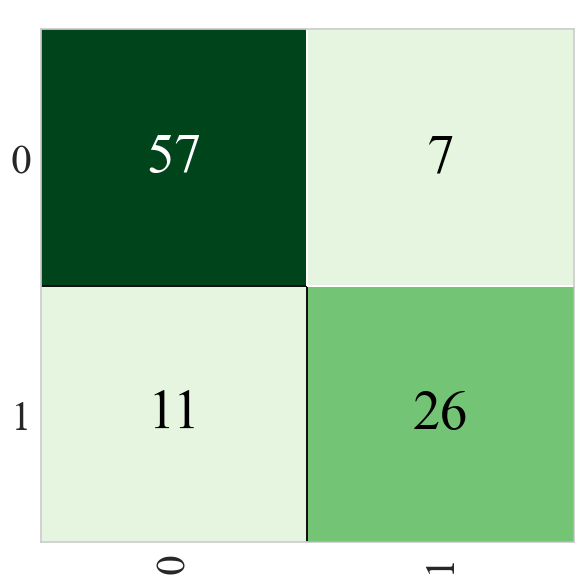

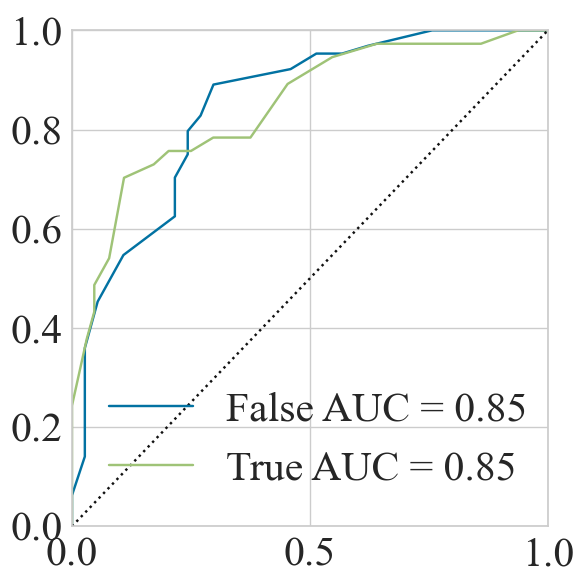

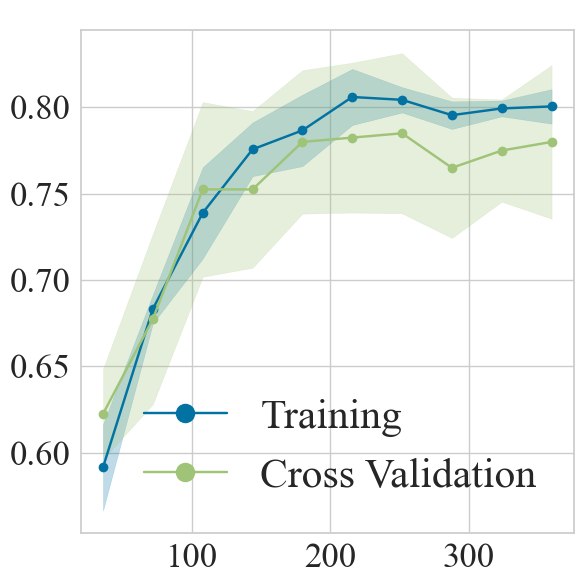

Sensitivity: 0.7027027027027027
Specificity: 0.890625
J: 0.5933277027027026
PPV: 0.7878787878787878
NPV: 0.8382352941176471


In [25]:
# Construct a KNN model with sklearn.
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train, y_train)
y_pred_KNN = knn.predict(x_test)
KNNAcc = accuracy_score(y_pred_KNN,y_test)
print(KNNAcc)

print(classification_report(y_test, y_pred_KNN))
plt.rcParams['font.family'] = 'Times New Roman'

fig1, ax1 = plt.subplots(figsize=(6, 6)) 
knnmatrix = ConfusionMatrix(knn, ax=ax1, cmap='Greens', title=' ')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

for text in ax1.texts:  
    text.set_fontsize(40)  
ax1.set_xlabel('')  
ax1.set_ylabel('')  
ax1.tick_params(axis='both', labelsize=30)
fig1.tight_layout()  

# KNN ROC AUC
fig2, ax2 = plt.subplots(figsize=(6, 6)) 
knnrocauc = ROCAUC(knn, classes=['False', 'True'], ax=ax2, title=' ')
knnrocauc.fit(x_train, y_train)
knnrocauc.score(x_test, y_test)
knnrocauc.finalize()

ax2.tick_params(axis='both', labelsize=30) 
ax2.set_xlabel('')  
ax2.set_ylabel('') 
for line in ax2.get_lines(): 
    if 'micro' in line.get_label() or 'macro' in line.get_label():
        line.set_visible(False)  

legend = ax2.legend()
handles, labels = ax2.get_legend_handles_labels()

new_handles = []
new_labels = []
for handle, label in zip(handles, labels):
    if 'micro' not in label and 'macro' not in label:
        new_handles.append(handle)
        new_labels.append(label)
new_labels = ['False AUC = 0.85', 'True AUC = 0.85']

ax2.legend(new_handles, new_labels, fontsize=30, markerscale=2)
fig2.tight_layout()  # 调整布局

###KNN Learning Curve
fig3, ax3 = plt.subplots(figsize=(6, 6))  
train_sizes = np.linspace(0.1, 1.0, 10)  
knnlc = LearningCurve(knn, ax=ax3, title=' ',cv= 10, train_sizes=train_sizes, n_jobs=-1)
knnlc.fit(x_train, y_train)
knnlc.finalize()
ax3.tick_params(axis='both', labelsize=25)
ax3.set_xlabel('')  # 去掉x轴标签
ax3.set_ylabel('')  # 去掉y轴标签
handles, labels = ax3.get_legend_handles_labels()
new_labels = ['Training', 'Cross Validation']
ax3.legend(handles=handles, labels=new_labels, fontsize=30, markerscale=2)
# 调整布局
fig3.tight_layout()
###KNN Precision Recall Curve

# knncurve = PrecisionRecallCurve(knn, ax=ax4, ap_score=True, iso_f1_curves=True,
#                                 title='K-Nearest Neighbour Precision-Recall Curve')
# knncurve.fit(x_train, y_train)
# knncurve.score(x_test, y_test)
# knncurve.finalize()
plt.show()
# save plot
# fig1.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/knn_confusion_matrix.pdf', dpi=600)
# fig2.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/knn_ROC_AUC.pdf', dpi=600)
# fig3.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/knn_Learning_Curve.pdf', dpi=600)
## 特异性和敏感性
# 5. 提取 TP, TN, FP, FN
cm = confusion_matrix(y_test, y_pred_KNN)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# 6. 计算敏感性和特异性
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
PPV = TP / (TP + FP)
NPV = TN / (TN + FN)
J = sensitivity + specificity -1
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"J: {J}")
print(f"PPV: {PPV}")
print(f"NPV: {NPV}")

In [10]:
# Perform hyperparameter optimization for the SVM model using grid search.
# 支持向量机参数选择
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 3. 定义 SVC 参数网格
param_grid = {
    'C': [0.1, 1, 10, 100],  # 惩罚参数
    'kernel': ['linear', 'rbf'],  # 核函数
    'max_iter': [1000, 2000, 5000],  # 最大迭代次数
    'probability': [True]  # 启用概率估计
}

# 4. 创建 SVC 实例
svc = SVC()

# 5. 使用 GridSearchCV 寻找最佳参数
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')  # 5折交叉验证
grid_search.fit(x_train, y_train)

# 6. 输出最佳参数和模型评估
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数训练模型
best_svc = grid_search.best_estimator_

# 7. 在测试集上评估模型
x_pred = best_svc.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Construct a SVM model with sklearn.
plt.rcParams['font.family'] = 'Times New Roman'
svc = SVC(kernel='linear',max_iter=500,C=0.1,probability=True)
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
##支持向量机准确率
SVMAcc = accuracy_score(y_pred_svc,y_test)
print('支持向量机准确率',accuracy_score(y_pred_svc,y_test))
print('分类报告:',classification_report(y_test,y_pred_svc))
##模型性能评估

###支持向量机混淆矩阵
fig1, ax1 = plt.subplots(figsize=(6, 6)) 
svcmatrix = ConfusionMatrix(svc,ax=ax1,cmap='Greens',title=' ')
svcmatrix.fit(x_train,y_train)
svcmatrix.score(x_test,y_test)
svcmatrix.finalize()
# 修改混淆矩阵上数字的字体大小
for text in ax1.texts:  # ax1.texts 获取所有文本对象
    text.set_fontsize(40)  # 设置字体大小为20
ax1.set_xlabel('')  # 去掉x轴标签
ax1.set_ylabel('')  # 去掉y轴标签
ax1.tick_params(axis='both', labelsize=30)
fig1.tight_layout()

#####支持向量机ROC AUC
fig2, ax2 = plt.subplots(figsize=(6, 6)) 
svmrocauc = ROCAUC(svc,ax=ax2,cmap='PuRd',title=' ')
svmrocauc.fit(x_train,y_train)
svmrocauc.score(x_test,y_test)
svmrocauc.finalize()
# 修改坐标轴的字体大小
ax2.tick_params(axis='both', labelsize=30)  # 设置坐标轴刻度标签的字体大小
ax2.set_xlabel('')  # 去掉x轴标签
ax2.set_ylabel('')  # 去掉y轴标签
for line in ax2.get_lines():  # 遍历所有曲线
    if 'micro' in line.get_label() or 'macro' in line.get_label():
        line.set_visible(False)  # 隐藏这些曲线
# 遍历图例中的项
# 获取当前的图例
legend = ax2.legend()
# 遍历图例中的项，隐藏micro average和macro average的线条和文字
handles, labels = ax2.get_legend_handles_labels()
# 重新设置图例，排除micro和macro average
new_handles = []
new_labels = []
for handle, label in zip(handles, labels):
    if 'micro' not in label and 'macro' not in label:
        new_handles.append(handle)
        new_labels.append(label)
new_labels = ['False AUC = 0.83', 'True AUC = 0.83']
# 更新图例（隐藏 micro 和 macro，增大剩余图例项）
ax2.legend(new_handles, new_labels, fontsize=30, markerscale=2)
fig2.tight_layout()

#### 支持向量机Learning Curve 
fig3, ax3 = plt.subplots(figsize=(6, 6)) 
svmlearn = LearningCurve(svc,ax=ax3,cmap='PuRd',title=' ',cv= 10, train_sizes=train_sizes, n_jobs=-1)
svmlearn.fit(x_train,y_train)
svmlearn.finalize()
ax3.tick_params(axis='both', labelsize=25)
ax3.set_xlabel('')  # 去掉x轴标签
ax3.set_ylabel('')  # 去掉y轴标签
handles, labels = ax3.get_legend_handles_labels()
new_labels = ['Training', 'Cross Validation']
ax3.legend(handles=handles, labels=new_labels, fontsize=30, markerscale=2)
fig3.tight_layout()
# ####### 支持向量机 Precision-Recall曲线
# svmprecisionrecall = PrecisionRecallCurve(svc,ax=ax4,cmap='PuRd',title='Support Vector machine Precison-Recall Curve')
# svmprecisionrecall.fit(x_train,y_train)
# svmprecisionrecall.score(x_test,y_test)
# svmprecisionrecall.finalize()
# plt.tight_layout()
# plt.show()
# 保存图片
# fig1.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/svc_confusion_matrix.pdf', dpi=600)
# fig2.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/svc_ROC_AUC.pdf', dpi=600)
# fig3.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/svc_Learning_Curve.pdf', dpi=600)
## 特异性和敏感性
# 5. 提取 TP, TN, FP, FN
cm = confusion_matrix(y_test, y_pred_svc)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# 6. 计算敏感性和特异性
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
PPV = TP / (TP + FP)
NPV = TN / (TN + FN)
J = sensitivity + specificity -1
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"J: {J}")
print(f"PPV: {PPV}")
print(f"NPV: {NPV}")

In [12]:
# Perform hyperparameter optimization for the bays model using grid search.

# 定义参数范围
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

# 创建模型和网格搜索对象
gnb = GaussianNB()
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')
 
# 拟合模型
grid_search.fit(x_train, y_train)

# 输出最佳参数和对应的准确率
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

In [ ]:
# Construct a bays model with sklearn.
bays = GaussianNB(var_smoothing=0.01)
bays.fit(x_train,y_train)
y_pred_bays = bays.predict(x_test)
#######贝叶斯准确率
GNBAcc = accuracy_score(y_pred_bays,y_test)
print('贝叶斯模型准确率:',GNBAcc)
###########贝叶斯分类报告
print('贝叶斯模型分类报告：',classification_report(y_test,y_pred_bays))
########贝叶斯模型性能
plt.rcParams['font.family'] = 'Times New Roman'
# fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,8))

###贝叶斯混淆矩阵
fig1, ax1 = plt.subplots(figsize=(6, 6)) 
baysmatrix = ConfusionMatrix(bays,ax=ax1,cmap='Greens',title=' ')
baysmatrix.fit(x_train,y_train)
baysmatrix.score(x_test,y_test)
baysmatrix.finalize()
# 修改混淆矩阵上数字的字体大小
for text in ax1.texts:  # ax1.texts 获取所有文本对象
    text.set_fontsize(40)  # 设置字体大小为20
ax1.set_xlabel('')  # 去掉x轴标签
ax1.set_ylabel('')  # 去掉y轴标签
ax1.tick_params(axis='both', labelsize=30)
fig1.tight_layout()

#####贝叶斯ROC-AUC曲线
fig2, ax2 = plt.subplots(figsize=(6, 6)) 
baysrocauc = ROCAUC(bays,ax=ax2,cmap='PuRd',title=' ')
baysrocauc.fit(x_train,y_train)
baysrocauc.score(x_test,y_test)
baysrocauc.finalize()
# 修改坐标轴的字体大小
ax2.tick_params(axis='both', labelsize=30)  # 设置坐标轴刻度标签的字体大小
ax2.set_xlabel('')  # 去掉x轴标签
ax2.set_ylabel('')  # 去掉y轴标签
for line in ax2.get_lines():  # 遍历所有曲线
    if 'micro' in line.get_label() or 'macro' in line.get_label():
        line.set_visible(False)  # 隐藏这些曲线
# 遍历图例中的项
# 获取当前的图例
legend = ax2.legend()
# 遍历图例中的项，隐藏micro average和macro average的线条和文字
handles, labels = ax2.get_legend_handles_labels()
# 重新设置图例，排除micro和macro average
new_handles = []
new_labels = []
for handle, label in zip(handles, labels):
    if 'micro' not in label and 'macro' not in label:
        new_handles.append(handle)
        new_labels.append(label)
new_labels = ['False AUC = 0.88', 'True AUC = 0.88']
# 更新图例（隐藏 micro 和 macro，增大剩余图例项）
ax2.legend(new_handles, new_labels, fontsize=30, markerscale=2)
fig2.tight_layout()

####贝叶斯学习曲线
fig3, ax3 = plt.subplots(figsize=(6, 6)) 
bayslearn = LearningCurve(bays,ax=ax3,title=' ',cv= 10, train_sizes=train_sizes, n_jobs=-1)
bayslearn.fit(x_train,y_train)
bayslearn.finalize()
ax3.tick_params(axis='both', labelsize=25)
ax3.set_xlabel('')  # 去掉x轴标签
ax3.set_ylabel('')  # 去掉y轴标签
handles, labels = ax3.get_legend_handles_labels()
new_labels = ['Training', 'Cross Validation']
ax3.legend(handles=handles, labels=new_labels, fontsize=30, markerscale=2)
fig3.tight_layout()
# ###贝叶斯精确率与召回率
# bayscurve = PrecisionRecallCurve(bays,ax=ax4,cmap='PuRd',title='贝叶斯Precison-Recall')
# bayscurve.fit(x_train,y_train)
# bayscurve.score(x_test,y_test)
# bayscurve.finalize()
# SAVE PLOT
fig1.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/GNB_confusion_matrix.pdf', dpi=600)
fig2.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/GNB_ROC_AUC.pdf', dpi=600)
fig3.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/GNB_Learning_Curve.pdf', dpi=600)
plt.show()
## 特异性和敏感性
# 5. 提取 TP, TN, FP, FN
cm = confusion_matrix(y_test, y_pred_bays)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# 6. 计算敏感性和特异性
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
PPV = TP / (TP + FP)
NPV = TN / (TN + FN)
J = sensitivity + specificity -1
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"J: {J}")
print(f"PPV: {PPV}")
print(f"NPV: {NPV}")

In [14]:
# Perform hyperparameter optimization for the DecisionTree model using grid search.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 定义参数范围
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'splitter': ['best', 'random']
}

# 创建模型和网格搜索对象
dtc = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')

# 拟合模型
grid_search.fit(x_train, y_train)

# 输出最佳参数和对应的准确率
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

In [16]:
# Construct a DT model with sklearn.
tree = DecisionTreeClassifier(max_depth=3,min_samples_leaf=3,criterion='entropy',min_samples_split=5,splitter='best')
tree.fit(x_train,y_train)
y_pred_tree = tree.predict(x_test)
#####决策树准确率
DTCAcc = accuracy_score(y_pred_tree,y_test)
print('决策树的准确率：',DTCAcc)
####决策树模型分类报告
print('决策树分类报告',classification_report(y_test,y_pred_tree))
####模型质量评估
plt.rcParams['font.family'] = 'Times New Roman'
# fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8))

###决策树混淆矩阵
fig1, ax1 = plt.subplots(figsize=(6, 6)) 
treematrix = ConfusionMatrix(tree,ax=ax1,cmap='Greens',title=' ')
treematrix.fit(x_train,y_train)
treematrix.score(x_test,y_test)
treematrix.finalize()
# 修改混淆矩阵上数字的字体大小
for text in ax1.texts:  # ax1.texts 获取所有文本对象
    text.set_fontsize(40)  # 设置字体大小为20
ax1.set_xlabel('')  # 去掉x轴标签
ax1.set_ylabel('')  # 去掉y轴标签
ax1.tick_params(axis='both', labelsize=30)
fig1.tight_layout()

###决策树准确率-召回率
# treeprecisionrecall = PrecisionRecallCurve(tree,ax=ax2,cmap='PuRd',title='Precision_Recall')
# treeprecisionrecall.fit(x_train,y_train)
# treeprecisionrecall.score(x_test,y_test)
# treeprecisionrecall.finalize()

###决策树学习曲线
fig3, ax3 = plt.subplots(figsize=(6, 6)) 
treelearn = LearningCurve(tree,ax=ax3,cmap='PuRd',title=' ',cv= 10, train_sizes=train_sizes, n_jobs=-1)
treelearn.fit(x_train,y_train)
treelearn.finalize()
ax3.tick_params(axis='both', labelsize=25)
ax3.set_xlabel('')  # 去掉x轴标签
ax3.set_ylabel('')  # 去掉y轴标签
handles, labels = ax3.get_legend_handles_labels()
new_labels = ['Training', 'Cross Validation']
ax3.legend(handles=handles, labels=new_labels, fontsize=30, markerscale=2)
fig3.tight_layout()

# ##决策树ROC_ACU曲线图
fig2, ax2 = plt.subplots(figsize=(6, 6)) 
treerocauc = ROCAUC(tree,ax=ax2,cmap='PuRd',title=' ')
treerocauc.fit(x_train,y_train)
treerocauc.score(x_test,y_test)
treerocauc.finalize()
# 修改坐标轴的字体大小
ax2.tick_params(axis='both', labelsize=30)  # 设置坐标轴刻度标签的字体大小
ax2.set_xlabel('')  # 去掉x轴标签
ax2.set_ylabel('')  # 去掉y轴标签
for line in ax2.get_lines():  # 遍历所有曲线
    if 'micro' in line.get_label() or 'macro' in line.get_label():
        line.set_visible(False)  # 隐藏这些曲线
# 遍历图例中的项
# 获取当前的图例
legend = ax2.legend()
# 遍历图例中的项，隐藏micro average和macro average的线条和文字
handles, labels = ax2.get_legend_handles_labels()
# 重新设置图例，排除micro和macro average
new_handles = []
new_labels = []
for handle, label in zip(handles, labels):
    if 'micro' not in label and 'macro' not in label:
        new_handles.append(handle)
        new_labels.append(label)
new_labels = ['False AUC = 0.82', 'True AUC = 0.82']
# 更新图例（隐藏 micro 和 macro，增大剩余图例项）
ax2.legend(new_handles, new_labels, fontsize=30, markerscale=2)
fig2.tight_layout()
# plt.tight_layout()
# save plot
fig1.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/DT_confusion_matrix.pdf', dpi=600)
fig2.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/DT_ROC_AUC.pdf', dpi=600)
fig3.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/DT_Learning_Curve.pdf', dpi=600)
# 特异性和敏感性
# 5. 提取 TP, TN, FP, FN
cm = confusion_matrix(y_test, y_pred_tree)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# 6. 计算敏感性和特异性
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
PPV = TP / (TP + FP)
NPV = TN / (TN + FN)
J = sensitivity + specificity -1
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"J: {J}")
print(f"PPV: {PPV}")
print(f"NPV: {NPV}")

In [18]:
# Perform hyperparameter optimization for the RF and ET model using grid search.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 定义参数范围
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30]
}

# 创建随机森林模型
rf = RandomForestClassifier(random_state=1)

# 创建网格搜索对象
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# 拟合模型
grid_search.fit(x_train, y_train)

# 输出最佳参数和对应的准确率
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

In [ ]:
# # Construct a RF model with sklearn.
# rf = RandomForestClassifier(max_depth=6,max_features='sqrt',min_samples_leaf=2,n_estimators=700,random_state=7,max_leaf_nodes=30,min_samples_split=10)
# rf.fit(x_train,y_train)
# y_pred_rf = rf.predict(x_test)
# ######### 随机森林的准确率
# RFAcc = accuracy_score(y_pred_rf,y_test)
# print('随机森林准确率：',RFAcc)
# ####分类报告
# print('随机森林的分类报告',classification_report(y_test,y_pred_rf))
# #######模型评估
# plt.rcParams['font.family'] = 'Times New Roman'
# # fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8))

# ###混淆矩阵
# fig1, ax1 = plt.subplots(figsize=(6, 6))
# rfconfusion = ConfusionMatrix(rf,ax=ax1,cmap='Greens',title=' ')
# rfconfusion.fit(x_train,y_train)
# rfconfusion.score(x_test,y_test)
# rfconfusion.finalize()
# # 修改混淆矩阵上数字的字体大小
# for text in ax1.texts:  # ax1.texts 获取所有文本对象
#     text.set_fontsize(40)  # 设置字体大小为20
# ax1.set_xlabel('')  # 去掉x轴标签
# ax1.set_ylabel('')  # 去掉y轴标签
# ax1.tick_params(axis='both', labelsize=30)
# fig1.tight_layout()

# ##学习曲线
# fig3, ax3 = plt.subplots(figsize=(6, 6))
# rfcurve = LearningCurve(rf,ax=ax3,cmap='PuRd',title=' ',cv= 10, train_sizes=train_sizes, n_jobs=-1)
# rfcurve.fit(x_train,y_train)
# rfcurve.finalize()
# ax3.tick_params(axis='both', labelsize=25)
# ax3.set_xlabel('')  # 去掉x轴标签
# ax3.set_ylabel('')  # 去掉y轴标签
# handles, labels = ax3.get_legend_handles_labels()
# new_labels = ['Training', 'Cross Validation']
# ax3.legend(handles=handles, labels=new_labels, fontsize=30, markerscale=2)
# fig3.tight_layout()

# ##随机森林-ROC_AUC曲线
# fig2, ax2 = plt.subplots(figsize=(6, 6))
# rfrocauc = ROCAUC(rf,ax=ax2,cmap='PuRd',title=' ')
# rfrocauc.fit(x_train,y_train)
# rfrocauc.score(x_test,y_test)
# rfrocauc.finalize()
# # 修改坐标轴的字体大小
# ax2.tick_params(axis='both', labelsize=30)  # 设置坐标轴刻度标签的字体大小
# ax2.set_xlabel('')  # 去掉x轴标签
# ax2.set_ylabel('')  # 去掉y轴标签
# for line in ax2.get_lines():  # 遍历所有曲线
#     if 'micro' in line.get_label() or 'macro' in line.get_label():
#         line.set_visible(False)  # 隐藏这些曲线
# # 遍历图例中的项
# # 获取当前的图例
# legend = ax2.legend()
# # 遍历图例中的项，隐藏micro average和macro average的线条和文字
# handles, labels = ax2.get_legend_handles_labels()
# # 重新设置图例，排除micro和macro average
# new_handles = []
# new_labels = []
# for handle, label in zip(handles, labels):
#     if 'micro' not in label and 'macro' not in label:
#         new_handles.append(handle)
#         new_labels.append(label)
# new_labels = ['False AUC = 0.85', 'True AUC = 0.85']
# # 更新图例（隐藏 micro 和 macro，增大剩余图例项）
# ax2.legend(new_handles, new_labels, fontsize=30, markerscale=2)
# fig2.tight_layout()

# # ###随机森林Precison_recall曲线
# # rfprecisionrecall = PrecisionRecallCurve(rf,ax=ax4,title='随机森林Precision_Recall曲线')
# # rfprecisionrecall.fit(x_train,y_train)
# # rfprecisionrecall.score(x_test,y_test)
# # rfprecisionrecall.finalize()
# # plt.tight_layout()
# # plt.show()
# # save plot
# fig1.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/RF_confusion_matrix.pdf', dpi=600)
# fig2.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/RF_ROC_AUC.pdf', dpi=600)
# fig3.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/RF_Learning_Curve.pdf', dpi=600)
# ## 特异性和敏感性
# # 5. 提取 TP, TN, FP, FN
# cm = confusion_matrix(y_test, y_pred_rf)
# TN = cm[0, 0]
# FP = cm[0, 1]
# FN = cm[1, 0]
# TP = cm[1, 1]

# # 6. 计算敏感性和特异性
# sensitivity = TP / (TP + FN)
# specificity = TN / (TN + FP)
# PPV = TP / (TP + FP)
# NPV = TN / (TN + FN)
# J = sensitivity + specificity -1
# print(f"Sensitivity: {sensitivity}")
# print(f"Specificity: {specificity}")
# print(f"J: {J}")
# print(f"PPV: {PPV}")
# print(f"NPV: {NPV}")

In [ ]:
# Construct a ET model with sklearn.
extraTreeclassfier = ExtraTreesClassifier(max_depth=10,max_features='sqrt',min_samples_leaf=2,n_estimators=1000,random_state=3,max_leaf_nodes=30,min_samples_split=10)
extraTreeclassfier.fit(x_train,y_train)
y_pred_extratree = extraTreeclassfier.predict(x_test)
######准确率评价
ETAcc = accuracy_score(y_pred_extratree,y_test)
print('Extra Tree分类器模型评价：',ETAcc)
#####模型分类评价
print('分类报告',classification_report(y_test,y_pred_extratree))
#####模型的性能评价

##混淆矩阵
plt.rcParams['font.family'] = 'Times New Roman'
fig1, ax1 = plt.subplots(figsize=(6, 6))
extraTreematrix = ConfusionMatrix(extraTreeclassfier,cmap='Greens',title=' ',ax=ax1)
extraTreematrix.fit(x_train,y_train)
extraTreematrix.score(x_test,y_test)
extraTreematrix.finalize()
# 修改混淆矩阵上数字的字体大小
for text in ax1.texts:  # ax1.texts 获取所有文本对象
    text.set_fontsize(40)  # 设置字体大小为20
ax1.set_xlabel('')  # 去掉x轴标签
ax1.set_ylabel('')  # 去掉y轴标签
ax1.tick_params(axis='both', labelsize=30)
fig1.tight_layout()

#学习曲线
fig2, ax2 = plt.subplots(figsize=(6, 6))
train_sizes = np.linspace(0.1, 1.0, 10)  
extraTreelearn = LearningCurve(extraTreeclassfier,cmap='PuRd',title=' ',ax=ax2,cv= 10, train_sizes=train_sizes, n_jobs=-1)
extraTreelearn.fit(x_train,y_train)
extraTreelearn.finalize()
ax3.tick_params(axis='both', labelsize=25)
ax3.set_xlabel('')  # 去掉x轴标签
ax3.set_ylabel('')  # 去掉y轴标签
handles, labels = ax3.get_legend_handles_labels()
new_labels = ['Training', 'Cross Validation']
ax3.legend(handles=handles, labels=new_labels, fontsize=30, markerscale=2)
fig2.tight_layout()

##ROC_AUC曲线
fig2, ax2 = plt.subplots(figsize=(6, 6))
extra_roc_auc = ROCAUC(extraTreeclassfier,cmap='PuRd',title=' ',ax=ax2,classes=['False','True'])
extra_roc_auc.fit(x_train,y_train)
extra_roc_auc.score(x_test,y_test)
extra_roc_auc.finalize()
# 修改坐标轴的字体大小
ax2.tick_params(axis='both', labelsize=30)  # 设置坐标轴刻度标签的字体大小
ax2.set_xlabel('')  # 去掉x轴标签
ax2.set_ylabel('')  # 去掉y轴标签
for line in ax2.get_lines():  # 遍历所有曲线
    if 'micro' in line.get_label() or 'macro' in line.get_label():
        line.set_visible(False)  # 隐藏这些曲线
# 遍历图例中的项
# 获取当前的图例
legend = ax2.legend()
# 遍历图例中的项，隐藏micro average和macro average的线条和文字
handles, labels = ax2.get_legend_handles_labels()
# 重新设置图例，排除micro和macro average
new_handles = []
new_labels = []
for handle, label in zip(handles, labels):
    if 'micro' not in label and 'macro' not in label:
        new_handles.append(handle)
        new_labels.append(label)
new_labels = ['False AUC = 0.87', 'True AUC = 0.87']
# 更新图例（隐藏 micro 和 macro，增大剩余图例项）
ax2.legend(new_handles, new_labels, fontsize=30, markerscale=2)
fig2.tight_layout()
###准确率与召回率
# extraprecisionrecall = PrecisionRecallCurve(extraTreeclassfier,cmap='PuRd',ax=ax4,title='Precision and Recall 曲线')
# extraprecisionrecall.fit(x_train,y_train)
# extraprecisionrecall.score(x_test,y_test)
# extraprecisionrecall.finalize()
# plt.tight_layout()
fig1.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/ET_confusion_matrix.pdf', dpi=600)
fig2.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/ET_ROC_AUC.pdf', dpi=600)
fig3.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/ET_Learning_Curve.pdf', dpi=600)
plt.show()
## 特异性和敏感性
# 5. 提取 TP, TN, FP, FN
cm = confusion_matrix(y_test, y_pred_extratree)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# 6. 计算敏感性和特异性
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
PPV = TP / (TP + FP)
NPV = TN / (TN + FN)
J = sensitivity + specificity -1
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"J: {J}")
print(f"PPV: {PPV}")
print(f"NPV: {NPV}")

In [41]:
# Perform hyperparameter optimization for the GB model using grid search.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# 定义参数范围
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'max_leaf_nodes': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# 创建梯度提升模型
gb = GradientBoostingClassifier(random_state=1)

# 创建网格搜索对象
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')

# 拟合模型
grid_search.fit(x_train, y_train)

# 输出最佳参数和最佳分数
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

KeyboardInterrupt: 

In [ ]:
# Construct a GB model with sklearn.
gb = GradientBoostingClassifier(learning_rate = 0.01, loss =  'exponential', max_depth = 9, max_leaf_nodes = 5, min_samples_leaf = 25, min_samples_split = 5, n_estimators = 500, subsample= 1)
gb.fit(x_train,y_train)
y_pred_gb = gb.predict(x_test)
####模型的准确率
GBAcc = accuracy_score(y_pred_gb, y_test)
print('模型准确率：',GBAcc)
####模型分类评估
print('分类报告',classification_report(y_test,y_pred_gb))
###模型性能评估

##混淆矩阵
plt.rcParams['font.family'] = 'Times New Roman'
# fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8))
fig1, ax1 = plt.subplots(figsize=(6, 6))
gbmatrix = ConfusionMatrix(gb,ax=ax1,cmap='Greens',title=' ')
gbmatrix.fit(x_train,y_train)
gbmatrix.score(x_test,y_test)
gbmatrix.finalize()

# 修改混淆矩阵上数字的字体大小
for text in ax1.texts:  # ax1.texts 获取所有文本对象
    text.set_fontsize(40)  # 设置字体大小为20
ax1.set_xlabel('')  # 去掉x轴标签
ax1.set_ylabel('')  # 去掉y轴标签
ax1.tick_params(axis='both', labelsize=30)
fig1.tight_layout()

##ROC_AUC曲线
fig2, ax2 = plt.subplots(figsize=(6, 6))
gbrocauc = ROCAUC(gb,ax=ax2,cmap='PuRd',classes=['False','True'],title=' ')
gbrocauc.fit(x_train,y_train)
gbrocauc.score(x_test,y_test)
gbrocauc.finalize()
# 修改坐标轴的字体大小
ax2.tick_params(axis='both', labelsize=30)  # 设置坐标轴刻度标签的字体大小
ax2.set_xlabel('')  # 去掉x轴标签
ax2.set_ylabel('')  # 去掉y轴标签
for line in ax2.get_lines():  # 遍历所有曲线
    if 'micro' in line.get_label() or 'macro' in line.get_label():
        line.set_visible(False)  # 隐藏这些曲线
# 遍历图例中的项
# 获取当前的图例
legend = ax2.legend()
# 遍历图例中的项，隐藏micro average和macro average的线条和文字
handles, labels = ax2.get_legend_handles_labels()
# 重新设置图例，排除micro和macro average
new_handles = []
new_labels = []
for handle, label in zip(handles, labels):
    if 'micro' not in label and 'macro' not in label:
        new_handles.append(handle)
        new_labels.append(label)
new_labels = ['False AUC = 0.85', 'True AUC = 0.85']
# 更新图例（隐藏 micro 和 macro，增大剩余图例项）
ax2.legend(new_handles, new_labels, fontsize=30, markerscale=2)
fig2.tight_layout()

###学习曲线
fig3, ax3 = plt.subplots(figsize=(6, 6))
gblearn = LearningCurve(gb,ax=ax3,cmap='PuRd',title=' ',cv= 10, train_sizes=train_sizes, n_jobs=-1)
gblearn.fit(x_train,y_train)
gblearn.finalize()
ax3.tick_params(axis='both', labelsize=25)
ax3.set_xlabel('')  # 去掉x轴标签
ax3.set_ylabel('')  # 去掉y轴标签
handles, labels = ax3.get_legend_handles_labels()
new_labels = ['Training', 'Cross Validation']
ax3.legend(handles=handles, labels=new_labels, fontsize=30, markerscale=2)
fig3.tight_layout()
##Precision_recall曲线
# gbpr = PrecisionRecallCurve(gb,ax=ax4,cmap='PuRd',title='Gradient Boosting Precision Recall曲线')
# gbpr.fit(x_train,y_test)
# gbpr.score(x_test,y_test)
# gbpr.finalize()
fig1.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/GB_confusion_matrix.pdf', dpi=600)
fig2.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/GB_ROC_AUC.pdf', dpi=600)
fig3.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/GB_Learning_Curve.pdf', dpi=600)
## 特异性和敏感性
# 5. 提取 TP, TN, FP, FN
cm = confusion_matrix(y_test, y_pred_gb)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# 6. 计算敏感性和特异性
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
PPV = TP / (TP + FP)
NPV = TN / (TN + FN)
J = sensitivity + specificity -1
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"J: {J}")
print(f"PPV: {PPV}")
print(f"NPV: {NPV}")

In [43]:
# Perform hyperparameter optimization for the LR model using grid search.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 定义参数范围
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # 因为 l1 需要 liblinear
    'max_iter': [100, 500, 1000]
}

# 创建模型
lr = LogisticRegression(random_state=1)

# 使用 GridSearchCV 进行调参
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# 输出最佳参数和得分
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

Best parameters found: {'C': 10.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8275


E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\m'
<>:79: SyntaxWarning: invalid escape sequence '\m'
<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\m'
<>:79: SyntaxWarning: invalid escape sequence '\m'
C:\Users\19161\AppData\Local\Temp\ipykernel_9292\3651079066.py:77: SyntaxWarning: invalid escape sequence '\m'
  fig1.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/LR_confusion_matrix.pdf', dpi=600)
C:\Users\19161\AppData\Local\Temp\ipykernel_9292\3651079066.py:78: SyntaxWarning: invalid escape sequence '\m'
  fig2.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/LR_ROC_AUC.pdf', dpi=600)
C:\Users\19161\AppData\Local\Temp\ipykernel_9292\3651079066.py:79: SyntaxWarning: invalid escape sequence '\m'
  fig3.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/LR_Learning_Curve.pdf', dpi=600)
E:\Anaconda\Lib\site-packages\sklear

逻辑回归准确率: 0.7722772277227723
————————---------------分类报告-------------————————————————————————————
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        64
           1       0.67      0.76      0.71        37

    accuracy                           0.77       101
   macro avg       0.76      0.77      0.76       101
weighted avg       0.78      0.77      0.77       101



E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

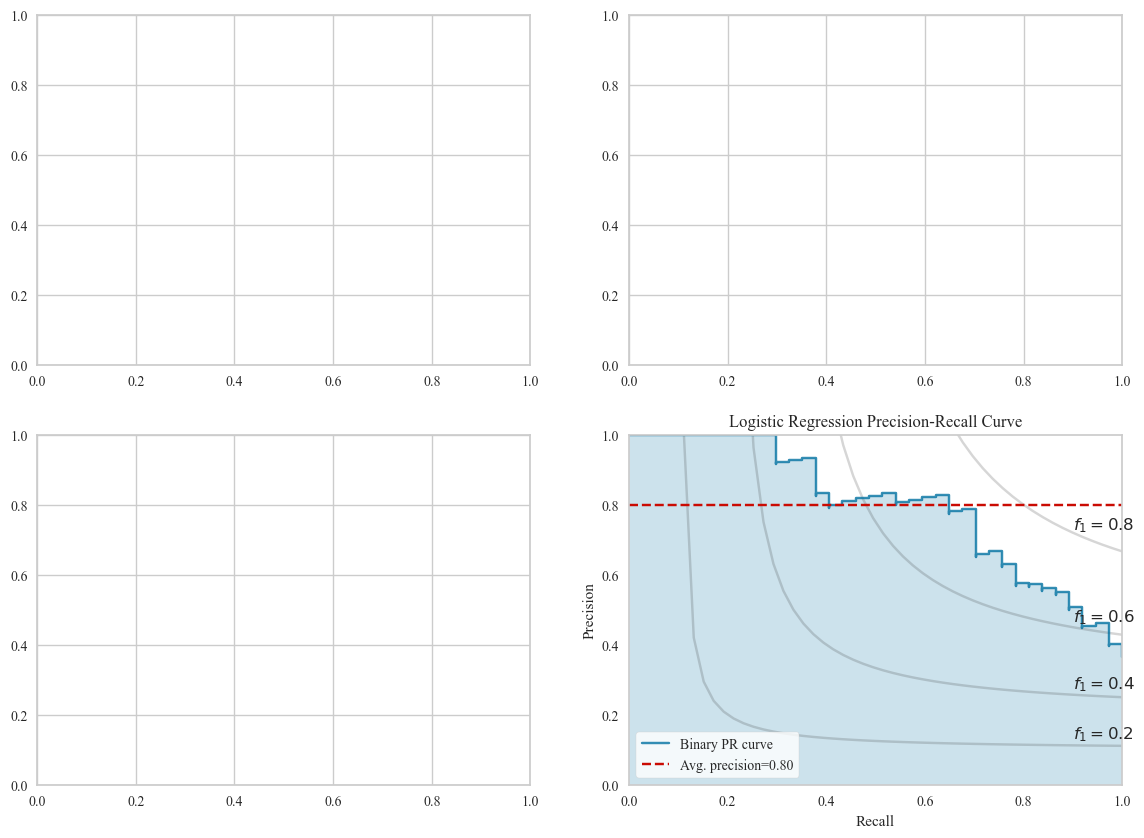

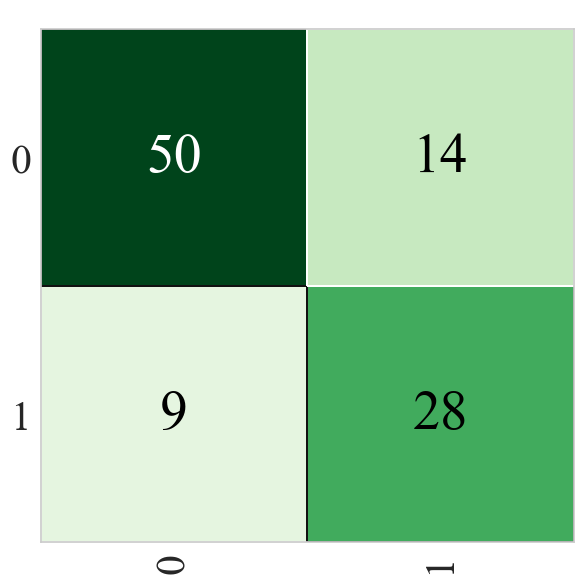

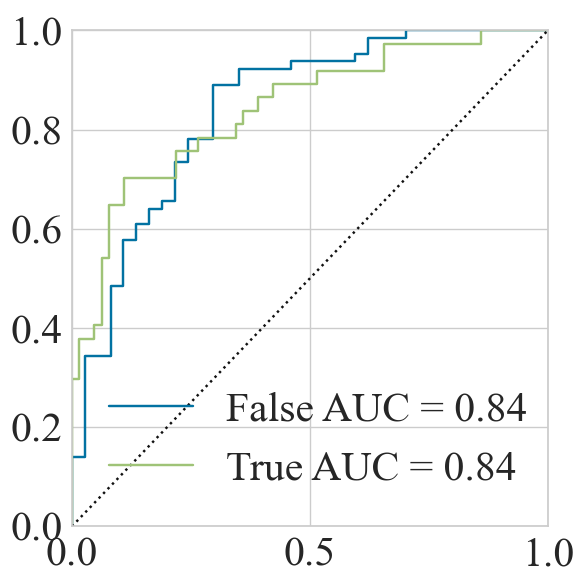

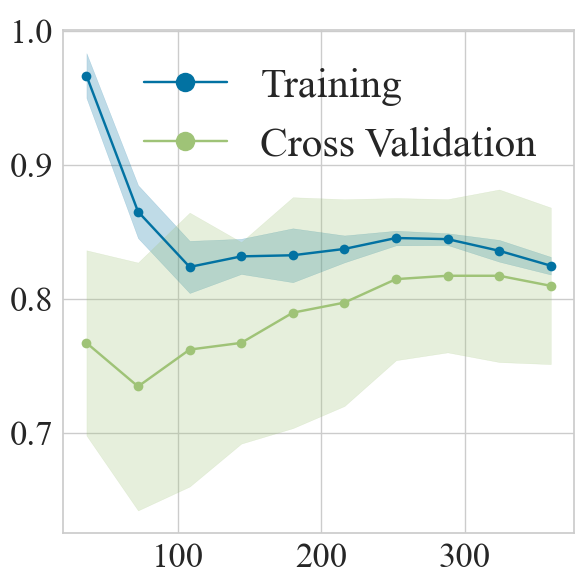

Sensitivity: 0.7567567567567568
Specificity: 0.78125
J: 0.5380067567567568
PPV: 0.6666666666666666
NPV: 0.847457627118644


In [47]:
# Construct a LR model with sklearn.
lr = LogisticRegression(max_iter=100,C = 100,solver='liblinear',penalty='l2') #定义逻辑回归模型并设定参数
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
######逻辑回归的准确率报告
LRAcc = accuracy_score(y_pred_lr,y_test)
print('逻辑回归准确率:',LRAcc)
print('————————---------------分类报告-------------————————————————————————————')
print(classification_report(y_test,y_pred_lr))
 #############模型的性能评估
plt.rcParams['font.family'] = 'Times New Roman'
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(14,10))

##混淆矩阵
fig1, ax1 = plt.subplots(figsize=(6, 6))
logmatrix = ConfusionMatrix(lr,ax=ax1,cmap='Greens',title=' ')
logmatrix.fit(x_train,y_train)
logmatrix.score(x_test,y_test)
logmatrix.finalize()
# 修改混淆矩阵上数字的字体大小
for text in ax1.texts:  # ax1.texts 获取所有文本对象
    text.set_fontsize(40)  # 设置字体大小为20
ax1.set_xlabel('')  # 去掉x轴标签
ax1.set_ylabel('')  # 去掉y轴标签
ax1.tick_params(axis='both', labelsize=30)
fig1.tight_layout()

##逻辑回归的ROC、AUC曲线
fig2, ax2 = plt.subplots(figsize=(6, 6))
logrocauc = ROCAUC(lr,classes=['False','True'],ax=ax2,title=' ')
logrocauc.fit(x_train,y_train)
logrocauc.score(x_test,y_test)
logrocauc.finalize()
# 修改坐标轴的字体大小
ax2.tick_params(axis='both', labelsize=30)  # 设置坐标轴刻度标签的字体大小
ax2.set_xlabel('')  # 去掉x轴标签
ax2.set_ylabel('')  # 去掉y轴标签
for line in ax2.get_lines():  # 遍历所有曲线
    if 'micro' in line.get_label() or 'macro' in line.get_label():
        line.set_visible(False)  # 隐藏这些曲线
# 遍历图例中的项
# 获取当前的图例
legend = ax2.legend()
# 遍历图例中的项，隐藏micro average和macro average的线条和文字
handles, labels = ax2.get_legend_handles_labels()
# 重新设置图例，排除micro和macro average
new_handles = []
new_labels = []
for handle, label in zip(handles, labels):
    if 'micro' not in label and 'macro' not in label:
        new_handles.append(handle)
        new_labels.append(label)
new_labels = ['False AUC = 0.84', 'True AUC = 0.84']
# 更新图例（隐藏 micro 和 macro，增大剩余图例项）
ax2.legend(new_handles, new_labels, fontsize=30, markerscale=2)
fig2.tight_layout()

####逻辑回归学习曲线
fig3, ax3 = plt.subplots(figsize=(6, 6))
loglc = LearningCurve(lr,ax=ax3,title=' ',cv= 10, train_sizes=train_sizes, n_jobs=-1)
loglc.fit(x_train,y_train)
loglc.finalize()
ax3.tick_params(axis='both', labelsize=25)
ax3.set_xlabel('')  # 去掉x轴标签
ax3.set_ylabel('')  # 去掉y轴标签
handles, labels = ax3.get_legend_handles_labels()
new_labels = ['Training', 'Cross Validation']
ax3.legend(handles=handles, labels=new_labels, fontsize=30, markerscale=2)
fig3.tight_layout()
####逻辑回归准确率与召回率曲线
logcurve = PrecisionRecallCurve(lr,ax=ax4,ap_score=True,iso_f1_curves=True,title='Logistic Regression '
													   'Precision-Recall Curve')
logcurve.fit(x_train,y_train)
logcurve.score(x_test, y_test)
logcurve.finalize()
plt.tight_layout()
plt.show()
fig1.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/LR_confusion_matrix.pdf', dpi=600)
fig2.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/LR_ROC_AUC.pdf', dpi=600)
fig3.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/LR_Learning_Curve.pdf', dpi=600)
## 特异性和敏感性
# 5. 提取 TP, TN, FP, FN
cm = confusion_matrix(y_test, y_pred_lr)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# 6. 计算敏感性和特异性
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
PPV = TP / (TP + FP)
NPV = TN / (TN + FN)
J = sensitivity + specificity -1
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"J: {J}")
print(f"PPV: {PPV}")
print(f"NPV: {NPV}")

In [ ]:
# Ranking model performance based on ACC.
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine',
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting',
                                  'Extra Tree Classifier'],
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100,
                                      ETAcc*100]})

# --- Create Accuracy Comparison Table ---



compare = compare.sort_values(by='Accuracy', ascending=False)
print(compare)

In [49]:
# Based on ROC analysis to determine the threshold for the model.
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# 假设X和y是已经准备好的特征矩阵和标签
# 需要替换为实际数据
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化模型（参数与用户模型一致）

model = lr
# 训练模型（假设已拆分训练集）
# model.fit(X_train, y_train)

# 获取预测概率（假设在测试集上）
y_proba = model.predict_proba(x_test)[:, 1]

# 生成ROC曲线数据
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# 计算特异度（TNR = 1 - FPR）
specificity = 1 - fpr

# 计算Youden指数
youden_index = tpr + specificity - 1  # 等效于 tpr - fpr

# 找到最佳阈值
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]
optimal_sensitivity = tpr[optimal_idx]
optimal_specificity = specificity[optimal_idx]

# 计算AUC
auc = roc_auc_score(y_test, y_proba)

print(f"AUC值: {auc:.2f}")
print(f"最佳阈值: {optimal_threshold:.2f}")
print(f"对应灵敏度: {optimal_sensitivity:.2%}")
print(f"对应特异度: {optimal_specificity:.2%}")


AUC值: 0.84
最佳阈值: 0.60
对应灵敏度: 70.27%
对应特异度: 89.06%


In [ ]:
# Construct a WPV model with sklearn.
WPV_model = VotingClassifier(
            estimators=[('rf', rf), 
                ('bays', bays), 
                ('knn', knn)],
            voting='hard',  # 使用硬投票，即根据模型的预测概率加权投票
            weights=[1, 1, 1],  # 这里可以为每个基模型设置不同的权重
            verbose=1
        )
WPV_model.fit(x_train,y_train)
y_pred_WPV_model = WPV_model.predict(x_test)
######逻辑回归的准确率报告
WPV_modelAcc = accuracy_score(y_pred_WPV_model,y_test)
print('逻辑回归准确率:',WPV_modelAcc)
print('————————---------------分类报告-------------————————————————————————————')
print(classification_report(y_test,y_pred_WPV_model))
# KNN 混淆矩阵
fig1, ax1 = plt.subplots(figsize=(6, 6))  # 为混淆矩阵创建单独的figure和axis
WPV_modelmatrix = ConfusionMatrix(WPV_model, ax=ax1, cmap='Blues', title=' ')
WPV_modelmatrix.fit(x_train, y_train)
WPV_modelmatrix.score(x_test, y_test)
WPV_modelmatrix.finalize()
for text in ax1.texts:  # ax1.texts 获取所有文本对象
    text.set_fontsize(40)  # 设置字体大小为20
ax1.tick_params(axis='both', labelsize=30)
ax1.set_xlabel('Predicted Labels', fontsize=30)  # 设置x轴标签字体大小
ax1.set_ylabel('True Labels', fontsize=30)  # 设置y轴标签字体大小
fig1.tight_layout()  # 调整布局
fig1.savefig('E:\machine learning\qiguanqiekai\文章\图表\图片\models performance/WPV_confusion_matrix.pdf', dpi=600)

## 特异性和敏感性
# 5. 提取 TP, TN, FP, FN
cm = confusion_matrix(y_test, y_pred_WPV_model)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# 6. 计算敏感性和特异性
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
PPV = TP / (TP + FP)
NPV = TN / (TN + FN)
J = sensitivity + specificity -1
print(f"accuracy: {WPV_modelAcc}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"J: {J}")
print(f"PPV: {PPV}")
print(f"NPV: {NPV}")

In [ ]:
model_shap = rf  # models = [extraTreeclassfier, knn, rf, gb, svc, tree, lr, ABclassifier, bays] 

model_shap.fit(x_train, y_train)
y_pred_rf = model_shap.predict(x_test)
feature_names = ['Disease Duration', 'Primary Disease', 'Limb Paralysis', 'GCS', 'Dysphagia', 'Sputum Culture Pathogens', 'IL-6', 
                 'Lymphocytes', 'URSA', 'Mental Disorders', 'PE', 'ALB']
plt.rcParams['font.family'] = 'Times New Roman'
# 创建解释器
explainer = shap.TreeExplainer(model_shap)

# 计算 SHAP 值
shap_values = explainer.shap_values(x_test)
canvas = FigureCanvas(fig)
canvas.draw()
# 计算 SHAP 值
shap_values = explainer.shap_values(x_test)
fig = plt.figure()
# 绘制 SHAP summary plot（根据绝对 SHAP 值大小排序）
shap.summary_plot(shap_values[:,:,1], x_test,feature_names=feature_names)
# 调整每张图片的刻度和 colorbar 字体大小

# # 保存图像到指定文件夹，设置高分辨率
save_path = 'E:\machine learning\qiguanqiekai\文章\图表\图片\SHAP/rfclassfier.pdf'  # 替换为实际文件夹路径和文件名
fig.savefig(save_path, dpi=600, bbox_inches='tight')  # dpi=300表示高分辨率，bbox_inches='tight' 去除多余空白
# plt.close()
fig2 = plt.figure()
shap.summary_plot(shap_values[:,:,1], x_test, plot_type="bar", feature_names=feature_names)
# 获取当前图的轴对象
ax = fig2.gca()  # 获取当前坐标轴

# 修改纵轴标签的字体大小
ax.tick_params(axis='y', labelsize=20)  # 将 '14' 改成您想要的字号大小
save_path2 = 'E:\machine learning\qiguanqiekai\文章\图表\图片\SHAP/rfclassfier_bar.pdf'
fig2.savefig(save_path2, dpi=600, bbox_inches='tight') 